http://cs229.stanford.edu/ps/ps1/ps1.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv('./quasar_train.csv')
cols_train = df_train.columns.values.astype(float).astype(int)

In [3]:
df_train.shape

(200, 450)

In [4]:
cols_train[-11:]

array([1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599])

In [5]:
df_train.head()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


In [6]:
df_test = pd.read_csv('./quasar_test.csv')
cols_test = df_test.columns.values.astype(float).astype(int)

In [7]:
# let's make usre that wave lengths are the same between the training data and testing data
assert (cols_train == cols_test).all()
df_train.columns = cols_train
df_test.columns = cols_test
wave_lens = cols_train

In [8]:
df_test.shape

(50, 450)

In [9]:
df_test.head()

,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.025,1.460,-0.057,1.37,2.090,1.150,-0.182,0.351,1.57,1.970,...,0.525,0.574,1.570,1.280,0.963,1.04,1.160,0.555,0.733,1.180
1,1.210,0.375,0.695,-0.09,0.275,-0.128,0.043,-0.054,1.40,1.950,...,0.658,0.579,1.670,1.230,1.230,1.19,1.220,0.932,1.280,0.338
2,1.380,-0.436,2.700,1.18,1.850,0.374,2.290,1.110,1.06,1.270,...,0.672,0.483,1.350,1.450,2.810,1.28,0.893,1.980,0.744,0.610
3,0.427,0.509,1.060,0.80,0.537,0.288,2.790,2.120,1.51,-0.937,...,0.928,1.020,0.462,1.040,1.070,1.64,1.250,0.706,0.673,1.480
4,-0.371,0.773,-0.621,1.84,0.284,-0.009,1.910,1.900,1.64,0.803,...,1.240,0.867,1.460,0.035,1.880,1.74,-0.225,0.711,-0.571,0.786


Take a quick look

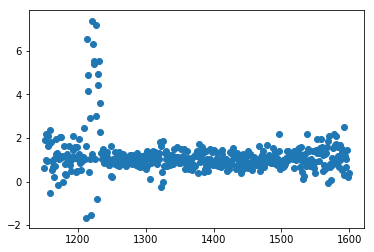

In [10]:
plt.scatter(wave_lens, df_train.loc[0])

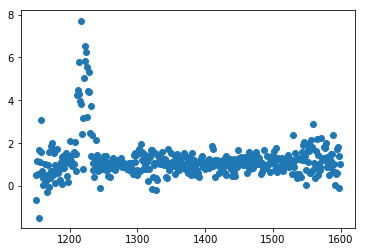

In [11]:
plt.scatter(wave_lens, df_test.loc[29])

# (a) i.

Let $W_{ii}=\frac{1}{2}w^{(i)}$ and $W_{ij}=0$ for $i\neq j$. Also let $z=X\theta - \vec{y}$. Then

$$\begin{align*}
z_i=(X\theta - \vec{y})_{i} &= \Bigg(\begin{bmatrix}(x^{(1)})^T\\\vdots\\(x^{(m)})^T \end{bmatrix}\begin{bmatrix}\theta_0\\\vdots\\\theta_n\end{bmatrix}-\begin{bmatrix}y^{(1)}\\\vdots\\y^{(m)}\end{bmatrix}\Bigg)_i\\
    &= \Bigg(\begin{bmatrix}(x^{(1)})^T\theta\\\vdots\\(x^{(m)})^T\theta \end{bmatrix}-\begin{bmatrix}y^{(1)}\\\vdots\\y^{(m)}\end{bmatrix}\Bigg)_i\\
    &= \Bigg(\begin{bmatrix}\theta^T x^{(1)}\\\vdots\\\theta^T x^{(n)} \end{bmatrix}-\begin{bmatrix}y^{(1)}\\\vdots\\y^{(m)}\end{bmatrix}\Bigg)_i\\
    &= \Bigg(\begin{bmatrix}\theta^T x^{(1)}-y^{(1)}\\\vdots\\\theta^T x^{(n)}-y^{(m)}\end{bmatrix}\Bigg)_i\\
    &= \theta^T x^{(i)}-y^{(i)}
\end{align*}$$

and

$$\begin{align*}
(X\theta - \vec{y})^T W (X\theta - \vec{y}) &= z^TWz\\
    &= \mathop{\sum\sum}_{ij}^{m} W_{ij} z_{i} z_{j} \tag{by PS0-Q1a}\\ 
    &= \sum_{i}^{m} \frac{1}{2}w^{(i)} (\theta^T x^{(i)} - y^{(i)}) (\theta^T x^{(i)} - y^{(i)})\tag{a.i.1} \\ 
    &=  \frac{1}{2}\sum_{i}^{m}w^{(i)} (\theta^T x^{(i)} - y^{(i)})^2 \\ 
    &= J(\theta)
\end{align*}$$

To make equation a.i.1 work, we had to choose $W_{ij}=0$ and for $i\neq j$ and $W_{ii}=\frac{1}{2}w^{(i)}$.

# (a) ii.

Let's compute the gradient:

$$\begin{align*}
\nabla_\theta J(\theta)&=\nabla_\theta\big((X\theta - \vec{y})^T W (X\theta - \vec{y})\big)\\
    &=\nabla_\theta\big((X\theta)^TWX\theta-(X\theta)^TW\vec{y}-\vec{y}^TWX\theta+\vec{y}^TW\vec{y}\big)\\
    &=\nabla_\theta\big(\theta^TX^TWX\theta-(X\theta)^TW\vec{y}-\vec{y}^TWX\theta\big)\\
    &=\nabla_\theta\big(\theta^TX^TWX\theta-[(X\theta)^TW\vec{y}]^T-\vec{y}^TWX\theta\big)\tag{a.ii.1}\\
    &=\nabla_\theta\big(\theta^TX^TWX\theta-\vec{y}^TW^T(X\theta)-\vec{y}^TWX\theta\big)\\
    &=\nabla_\theta\big(\theta^TX^TWX\theta-\vec{y}^TWX\theta-\vec{y}^TWX\theta\big)\tag{a.ii.2}\\
    &=\nabla_\theta\big(\theta^TX^TWX\theta-2\vec{y}^TWX\theta\big)\\
    &=\nabla_\theta\big(\theta^TX^TWX\theta\big)-2\nabla_\theta\big([(\vec{y}^TWX)^T]^T\theta\big)\\
    &=2X^TWX\theta-2\nabla_\theta\big([X^TW\vec{y}]^T\theta\big)\tag{a.ii.3}\\
    &=2X^TWX\theta-2X^TW\vec{y}\tag{a.ii.4}\\
    &=2\big(X^TWX\theta-X^TW\vec{y}\big)\\
\end{align*}$$

Note that a.ii.1 holds because $(X\theta)^TW\vec{y}\in\mathbb{R}$ and a.ii.2 holds because $W$ is symmetric. Also note that a.ii.3 follows because $X^TWX$ is symmetric:

$$\begin{align*}
(X^TWX)^T=X^TW^T(X^T)^T=X^TWX
\end{align*}$$

Hence we can apply PS0-Q1a: for symmetric $A$: $\nabla_x(x^TAx)=2Ax$.

Also note that a.ii.4 follows from PS0-Q1a: $\nabla_x(b^Tx)=b$.

Setting the gradient to zero implies that

$$\begin{align*}
X^TWX\theta-X^TW\vec{y}=0\\
\end{align*}$$

or

$$\begin{align*}
X^TWX\theta=X^TW\vec{y}\\
\end{align*}$$

or

$$\begin{align*}
\theta=(X^TWX)^{-1}X^TW\vec{y}\\
\end{align*}$$

# (a) iii.



$$\begin{align*}
MLE(\theta)&\equiv\mathop{\arg\,\max}\limits_{\theta}\,p(\vec{y}|X;\theta)\\
    &=\mathop{\arg\,\max}\limits_{\theta}\,\prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta)\tag{by independence assumption}\\
    &=\mathop{\arg\,\max}\limits_{\theta}\,\ln\prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta)\tag{log function is strictly increasing}\\
    &=\mathop{\arg\,\max}\limits_{\theta}\,\sum_{i=1}^m \ln p(y^{(i)}|x^{(i)};\theta)\\
    &=\mathop{\arg\,\max}\limits_{\theta}\,\sum_{i=1}^m \ln\Big[\frac{1}{\sqrt{2\pi}\sigma^{(i)}}\exp\Big(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}\Big)\Big]\\
    &=\mathop{\arg\,\max}\limits_{\theta}\,\sum_{i=1}^m \Big[\ln\frac{1}{\sqrt{2\pi}\sigma^{(i)}}-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}\Big]\\
    &=\mathop{\arg\,\max}\limits_{\theta}\,-\sum_{i=1}^m\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}\tag{discard constant term}\\
    &=\mathop{\arg\,\min}\limits_{\theta}\,\sum_{i=1}^m\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}\\
    &=\mathop{\arg\,\min}\limits_{\theta}\,\frac{1}{2}\sum_{i=1}^m\frac{1}{(\sigma^{(i)})^2}(y^{(i)}-\theta^Tx^{(i)})^2\\
    &=\mathop{\arg\,\min}\limits_{\theta}\,\frac{1}{2}\sum_{i=1}^mw^{(i)}(y^{(i)}-\theta^Tx^{(i)})^2\\
\end{align*}$$

where we define $w^{(i)}\equiv\frac{1}{(\sigma^{(i)})^2}$.

# (b) i.

In [12]:
df_train.head(1)

,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.629,1.91,0.976,2.161,0.964,2.068,1.63,1.716,2.378,-0.54,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.45,0.203,0.382


Implement $\theta = (X^T X)^{-1} X^T \vec{y}$ for normal cases, and $\theta = (X^T W X)^{-1} X^T W \vec{y}$ for general cases.

In [13]:
def optim(X, y, W=None):
    if W is None:
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    else:
        return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(y)

In [14]:
x0 = np.ones(df_train.shape[1])
x1 = wave_lens
y = df_train.head(1).values.ravel()
X = np.stack([x0, x1]).T
print("x0.shape={} x1.shape={} X.shape={} y.shape={}".format(x0.shape, x1.shape, X.shape, y.shape))

x0.shape=(450,) x1.shape=(450,) X.shape=(450, 2) y.shape=(450,)


In [15]:
theta = optim(X, y)
print("theta={}".format(theta))

theta=[  2.51339906e+00  -9.81122145e-04]


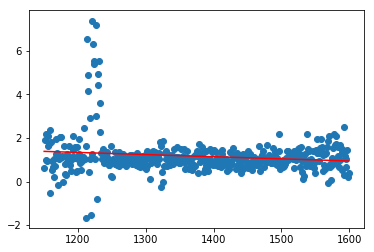

In [16]:
plt.scatter(wave_lens, df_train.loc[0].values)
plt.plot(wave_lens, X.dot(theta), 'r-')

# (b) ii.

In part a.i, we showed that the weight matrix consists of $W_{ij}=0$ and for $i\neq j$ and $W_{ii}=\frac{1}{2}w^{(i)}$.

In [17]:
def construct_weight_matrix(X, x_query_point, tau=5):
    return np.diag(np.exp(-(x_query_point[1] - X[:,1]) **2 / (2 * tau ** 2)))

In [18]:
x0 = np.ones(df_train.shape[1])
x1 = wave_lens
y = df_train.head(1).values.ravel()
X = np.stack([x0, x1]).T

In [19]:
preds = []
for k, x_query_point in enumerate(X):
    W = construct_weight_matrix(X, x_query_point)
    theta = optim(X, y, W)
    preds.append(theta.dot(x_query_point))

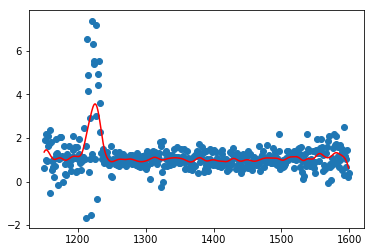

In [20]:
plt.scatter(wave_lens, df_train.loc[0].values)
plt.plot(wave_lens, preds, 'r-')

Althought it seems to work better, locally weighted linear regression does a new regression fit for every query point (typical of non-parametric model). This can be quite expensive.

TODO: refactor weighted linear regression to make it fast (vectorize).

# (b) iii.

Varying $\tau=$ tau values and see its effect

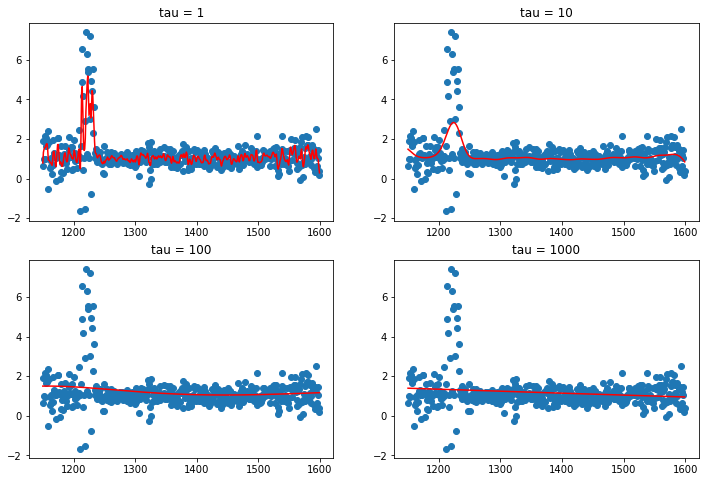

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for k, tau in enumerate([1, 10, 100, 1000]):
    ax = axes[k]
    preds = []
    for x_eval in X:
        W = construct_weight_matrix(X, x_eval, tau=tau)
        theta = optim(X, y, W)
        preds.append(theta.dot(x_eval))

    ax.scatter(wave_lens, df_train.loc[0].values)
    ax.plot(wave_lens, preds, 'r-')
    ax.set_title('tau = {0}'.format(tau))

When $\tau$ becomes small, the prediction is very sensitive to the distance between the query point and the training data... i.e. overfitting. When $\tau$ becomes big, the opposite happens... i.e. underfitting and nearly unweighted linear regression.

# (C) i.

Smooth all spectra

In [22]:
def lwr_single(X, y, x, tau=5):
    """locally weighted regression for a single observation"""
    W = construct_weight_matrix(X, x, tau=tau)
    theta = optim(X, y, W)
    return theta

In [23]:
def lwr(X, y, xs, tau=5):
    """lwr for multiple xs"""
    thetas = []
    for x in xs:
        th = lwr_single(X, y, x, tau)
        thetas.append(th)
    return thetas

In [24]:
# smoothed spectrum
fs_train = []
x0 = np.ones(df_train.shape[1])
x1 = wave_lens
X = np.stack([x0, x1]).T
# used for calculating distances d(f1, f2)
for k, row in df_train.iterrows():
    print(k, end=',')
    y = row.values
    thetas = lwr(X, y, X, tau=5)
    prd = [_t.dot(_x) for (_t, _x) in zip(thetas, X)]
    fs_train.append(prd)
df_fs_train = pd.DataFrame(fs_train, columns=df_train.columns)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,

In [25]:
df_fs_train.shape

(200, 450)

In [26]:
# smoothed spectrum
fs_test = []
x0 = np.ones(df_test.shape[1])
x1 = wave_lens
X = np.stack([x0, x1]).T
# used for calculating distances d(f1, f2)
for k, row in df_test.iterrows():
    print(k, end=',')
    y = row.values
    thetas = lwr(X, y, X, tau=5)
    prd = [_t.dot(_x) for (_t, _x) in zip(thetas, X)]
    fs_test.append(prd)
df_fs_test = pd.DataFrame(fs_test, columns=df_test.columns)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,

# (C) ii.

In [27]:
wl_right = wave_lens[wave_lens >= 1300]
wl_left = wave_lens[wave_lens < 1200]

In [28]:
df_fs_train_r = df_fs_train[wl_right]
df_fs_train_l = df_fs_train[wl_left]

In [29]:
df_fs_train_r.shape

(200, 300)

In [30]:
def ker(t):
    return np.max(1 - t, 0)

In [31]:
# This is very similar to k-nearest-neighbor algorithm:
# We select the neighbors based on distances calculated from the right spectrum, 
# and then calculate the weighted (based on distances) average of left spectrum
num_neighb = 3 # number of neighbors to consider
errors = []
preds_train = []
for k, row in df_fs_train_r.iterrows():
    dists = ((df_fs_train_r - row) ** 2).sum(axis=1)
    max_d = dists.max()
    neighb_ds = dists.sort_values()[:num_neighb]

    p1 = np.sum([ker(d / max_d) * df_fs_train_l.loc[idx] for (idx, d) in neighb_ds.iteritems()], axis=0) 
    p2 = np.sum([ker(d / max_d) for (idx, d) in neighb_ds.iteritems()])
    f_left_hat = p1 / p2
    preds_train.append(f_left_hat)
    error = np.sum((f_left_hat - df_fs_train_l.loc[k]) ** 2)
    errors.append(error)

In [32]:
np.mean(errors)

1.0663958023607554

Visualize some predictions

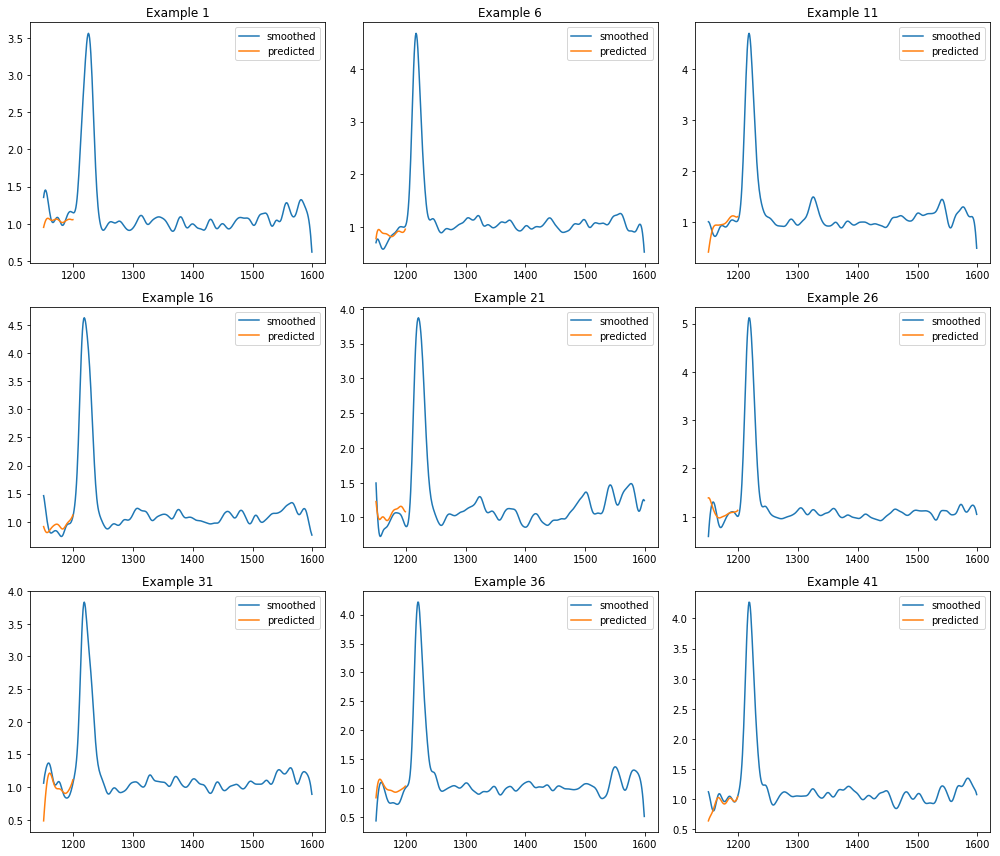

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.ravel()

for k, idx in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40]):
    ax = axes[k]
    ax.plot(wave_lens, df_fs_train.loc[idx], label='smoothed')
    ax.plot(wl_left, preds_train[idx], label='predicted')
    ax.legend()
    ax.set_title('Example {0}'.format(idx + 1))
plt.tight_layout()

# (C) iii.

Predict test dataset based on training dataset

In [34]:
df_fs_test_r = df_fs_test[wl_right]
df_fs_test_l = df_fs_test[wl_left]

In [35]:
err_test = []
preds_test = []
for k, row in df_fs_test_r.iterrows():
    dists = ((df_fs_train_r - row) ** 2).sum(axis=1)
    max_d = dists.max()
    neighb_ds = dists.sort_values()[:num_neighb]

    p1 = np.sum([ker(d / max_d) * df_fs_train_l.loc[idx] for (idx, d) in neighb_ds.iteritems()], axis=0) 
    p2 = np.sum([ker(d / max_d) for (idx, d) in neighb_ds.iteritems()])
    f_left_hat = p1 / p2
    preds_test.append(f_left_hat)
    err = np.sum((f_left_hat - df_fs_test_l.loc[k]) ** 2)
    err_test.append(err)

In [36]:
np.mean(err_test)

2.7099695793690519

Plot for 9 test examples, including 1, 6

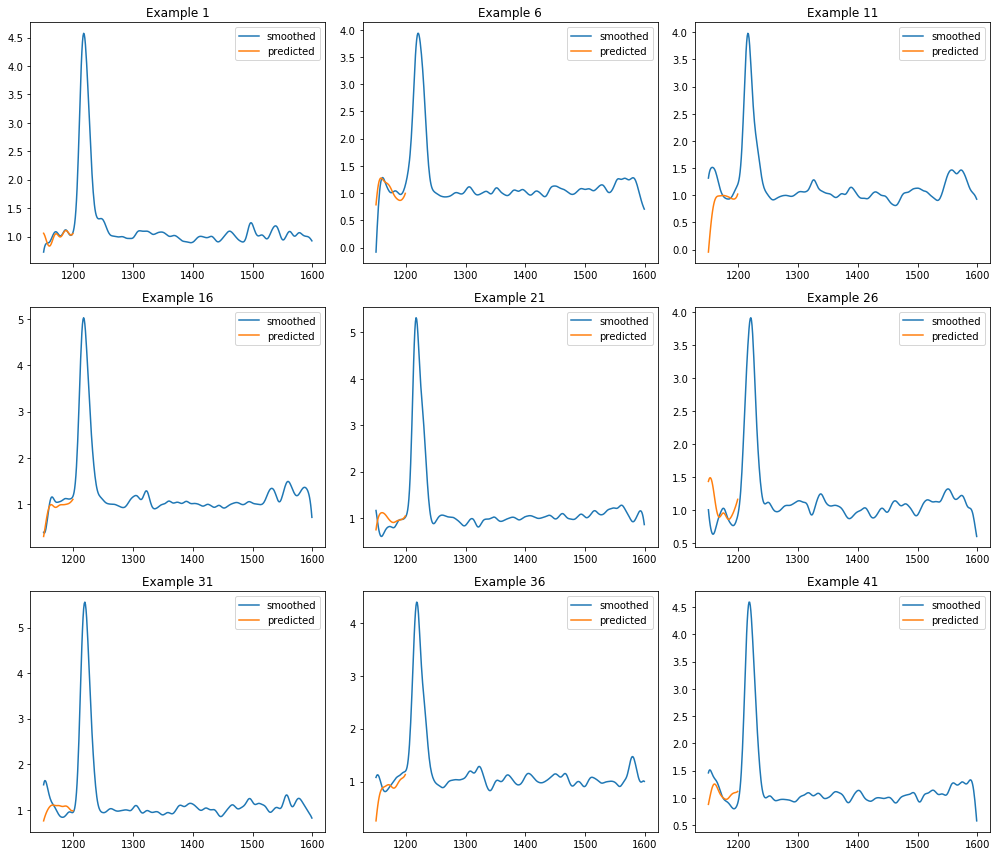

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.ravel()

for k, idx in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40]):
    ax = axes[k]
    ax.plot(wave_lens, df_fs_test.loc[idx], label='smoothed')
    ax.plot(wl_left, preds_test[idx], label='predicted')
    ax.legend()
    ax.set_title('Example {0}'.format(idx + 1))
plt.tight_layout()

Overall, the prediction is poor, for both training and testing data. It seems that Example 1 and 6 (requested in the problem set) are two of the better ones